In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Loading the dataset into a DataFrame

df = pd.read_csv("The Goldman Sachs.csv") 

print(df.head())


         Date     Open     High     Low    Close  Adj Close   Volume
0  2000-01-03  94.1875  94.3750  87.750  88.3125  65.690536  1822600
1  2000-01-04  87.0000  87.5000  82.250  82.7500  61.552921  1647700
2  2000-01-05  80.8750  81.8750  78.375  78.8750  58.670509  1516600
3  2000-01-06  78.6250  84.5000  78.625  82.2500  61.180992  1845100
4  2000-01-07  83.0625  83.1875  79.875  82.5625  61.413429  1127400


In [4]:
# Checking the summary statistics of the dataset

print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  5863.000000  5863.000000  5863.000000  5863.000000  5863.000000   
mean    171.307751   173.358368   169.242244   171.330473   148.188140   
std      77.553852    78.189664    76.870323    77.537132    79.743282   
min      54.000000    54.540001    47.410000    52.000000    41.506359   
25%     105.694999   107.090000   104.209999   105.720001    82.460209   
50%     162.199997   163.979996   160.539993   162.300003   135.398071   
75%     208.620002   210.675003   206.190002   208.434998   182.193649   
max     423.119995   426.160004   413.760010   423.850006   407.866791   

             Volume  
count  5.863000e+03  
mean   5.257445e+06  
std    6.011657e+06  
min    3.971000e+05  
25%    2.495800e+06  
50%    3.521300e+06  
75%    5.526250e+06  
max    1.145907e+08  


In [ ]:
# Checking the number of missing values in each column

print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [14]:
# Calculating the daily price change

df["price_change"] = df["Close"] - df["Open"]
print(df.head())


         Date     Open     High     Low    Close  Adj Close   Volume  \
0  2000-01-03  94.1875  94.3750  87.750  88.3125  65.690536  1822600   
1  2000-01-04  87.0000  87.5000  82.250  82.7500  61.552921  1647700   
2  2000-01-05  80.8750  81.8750  78.375  78.8750  58.670509  1516600   
3  2000-01-06  78.6250  84.5000  78.625  82.2500  61.180992  1845100   
4  2000-01-07  83.0625  83.1875  79.875  82.5625  61.413429  1127400   

   price_change  
0        -5.875  
1        -4.250  
2        -2.000  
3         3.625  
4        -0.500  


In [16]:
# Finding the days with the highest trading volume

max_volume_days = df[df["Volume"] == df["Volume"].max()]
print(max_volume_days)

            Date   Open   High        Low  Close  Adj Close     Volume  \
2190  2008-09-18  106.0  120.0  86.309998  108.0  85.943291  114590700   

      price_change  
2190           2.0  


In [18]:
# Calculating the maximum closing price

max_closing_price = df["Close"].max()
print("Maximum Closing Price:", max_closing_price)

Maximum Closing Price: 423.850006


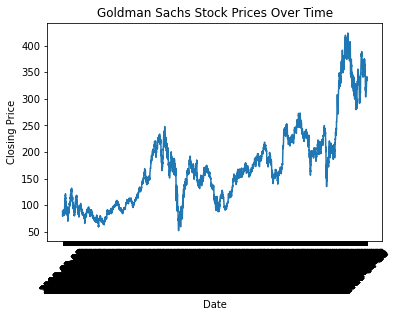

In [20]:
# Ploting the closing prices over time

plt.plot(df["Date"], df["Close"])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Goldman Sachs Stock Prices Over Time")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Extracting the year from the date column

df["Year"] = pd.to_datetime(df["Date"]).dt.year

# Calculating the average daily trading volume per year

average_volume_per_year = df.groupby("Year")["Volume"].mean()
print(average_volume_per_year)

Year
2000    1.846154e+06
2001    3.064123e+06
2002    4.467325e+06
2003    3.901063e+06
2004    3.605563e+06
2005    3.759582e+06
2006    4.653116e+06
2007    9.618481e+06
2008    1.677554e+07
2009    1.589128e+07
2010    1.091655e+07
2011    6.717975e+06
2012    5.120835e+06
2013    3.595223e+06
2014    2.924638e+06
2015    2.790862e+06
2016    3.744334e+06
2017    3.239078e+06
2018    3.383131e+06
2019    2.578574e+06
2020    3.589678e+06
2021    2.737287e+06
2022    2.626919e+06
2023    2.896507e+06
Name: Volume, dtype: float64


In [23]:
# Calculating the correlation matrix

correlation_matrix = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].corr()
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999668  0.999589  0.999275   0.993909 -0.166318
High       0.999668  1.000000  0.999440  0.999639   0.994310 -0.158763
Low        0.999589  0.999440  1.000000  0.999638   0.994177 -0.177577
Close      0.999275  0.999639  0.999638  1.000000   0.994579 -0.167703
Adj Close  0.993909  0.994310  0.994177  0.994579   1.000000 -0.184403
Volume    -0.166318 -0.158763 -0.177577 -0.167703  -0.184403  1.000000


In [24]:
# Finding the days with the largest price gap between the open and previous close
# Calculating the price gap
df['price_gap'] = df['Open'] - df['Close'].shift(1)
largest_price_gap_days = df[df['price_gap'] == df['price_gap'].max()]
print(largest_price_gap_days)


            Date        Open        High    Low       Close   Adj Close  \
2191  2008-09-19  142.509995  144.979996  116.0  129.800003  103.291092   

        Volume  price_change  Year  price_gap  
2191  43208300    -12.709992  2008  34.509995  


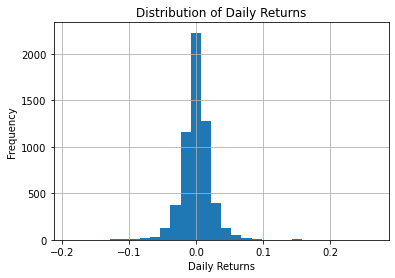

In [25]:
# Calculating the daily returns
df['returns'] = df['Close'].pct_change()

# Plot the histogram of daily returns
df['returns'].hist(bins=30)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.show()